In [327]:
import random
import warnings 
warnings.filterwarnings("ignore")

random.seed(100)
#population vs traffic density fit 
#polutation as feature traffic density as target variable
size = 200

population =  [ 30*random.random() for i in range(0,size)]
roads    =    [  round(100*random.random()) for i in range(0,size)]
error    =    [   7*random.random() for i in range(0,size)]

#roads is degree in percent how well roads are , 
#if proper then less traffic like big roads even though population is quite heavy

traffic =     [(345+43*population[i]) - error[i] - 13*roads[i] for i in range(0,size) ]

_population =   [[ population[i]] for i in range(0,size)]
_roads =        [[ roads[i]] for i in range(0,size)]
#_traffic    =   [[ traffic[i]]    for i in range(0,size)]

#train data and test data 

split = int(0.75* size)

_pop_train         =    _population[0:split]
_traffic_train     =    traffic[0:split]
_roads_train       =    _roads[0:split]

_pop_test          =    _population[split:size]
_traffic_test      =    traffic[split:size]
_roads_test       =    _roads[split:size]



#lets make features into a table format like csv

#features = [ [_pop_train[i][0],_roads_train[i][0]] for i in range(0,split) ]
#to compensate the a0 value lets take that feature as f0 and is always 1

features = [ [_pop_train[i][0],_roads_train[i][0]] for i in range(0,split) ]
#features

clf = LinearRegression()
clf.fit(features,_traffic_train)
clf.coef_

array([ 42.98733444, -13.00100873])

In [110]:
sig_y = np.array(_traffic_train).sum()
sig_y

39472.06794873182

In [112]:
sig_x = np.array(_pop_train).sum()
sig_x

2278.832190993045

In [120]:
M = np.array(_traffic_train)*np.array(_pop_train)

In [134]:
sig_xy = [ (_pop_train[i][0])*(_traffic_train[i]) for i in range(0,split)]
# we have taken _pop_train[i][0] becuase 
#it is a list of lists and we are multipying with a list of values
#so sicne each list has only one lelemnt i used 0 index to extract that value
sig_xy_sum = np.array(sig_xy).sum()

In [131]:
sig_x2 = (np.array(_pop_train)**2).sum()
sig_x2

45329.23779509551

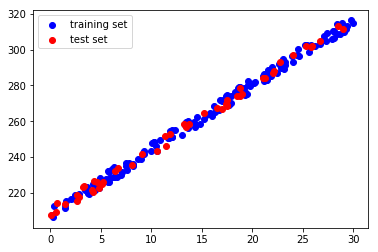

In [91]:
import matplotlib.pyplot as plt

plt.scatter(_pop_train,_traffic_train,color="b",label="training set")
plt.scatter(_pop_test,_traffic_test,color="r",label="test set")
plt.legend()
plt.show()


In [138]:
# finding best line from scratch

"""

Let ypredict = ax+b =f(x)
for i data points you have yi values corr for xi

error say e

e depends on a and b as e = y-ypredicted = y(Acutal)-f(x) =y-f(x)

e2 =loos fucntion j(a,b) 
J(a,b) = sigma i ( yi-f(xi)^2)
diff J(a,b) w.rt a and b and solve it
we get
slope
a = n * sum(x)*sum(y)   -  sum(xy) / n*sum(x**2) - sum(x)**2
n is number of data points
 
 """


#here n we have split number
import numpy as np

a_u = (split*sig_xy_sum) - (sig_x*sig_y)
a_l = (split*sig_x2) - ( sig_x **2)
slope = a_u/a_l


#intercept

"""
sigma y = n*a0 + a1 * sig x

a0 = intercept = sigma y - a1*sigx/n

"""

intercept = (sig_y - slope*sig_x) / split
intercept

208.33910401427056

In [139]:
slope

3.607638324175457

In [103]:
#lets verify with sklearn

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(_pop_train,_traffic_train)
clf.coef_

C:\Users\mahidhai\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


array([3.60763832])

In [140]:
clf.intercept_

#this technique is known as 

#  ORDINARY LEAST SQUARES 

#OLS ALGORITHM FOR LINEAR REGRESSION


208.33910401427056

In [127]:
l= [1,2,3]
l2 = [1,2,3]
l3 = [ l[i]*l2[i] for i in range(0,3)]
l3

[1, 4, 9]

In [326]:
clf = LinearRegression()
clf.fit(features,_traffic_train)
clf.coef_

array([ 42.98733444, -13.00100873])

In [325]:
# Multilinear regression
# solu is inv(xt.x) . x. y


#constructing X

train = [ [_traffic_train[i]] for i in range(0,split) ]
X = np.array(features)
y = np.array(train)
#solving
t = X.T
i1 = t.dot(X)
i2= linalg.inv(i1)

i3= t.dot(y)
solution = i2.dot(i3)
solution

array([[ 53.43337086],
       [-10.33286185]])

In [ ]:
# now

#this method assumes that error is small , but once if error is high enough
#our sklearn yet dispayds correct anwer however the 
#values of above method will change 

#Practically thinking if we add intercept , only the values of y would shift
#apparently the error would increase 
#this results in drastic change in the values of coefficeints

#sklearn implements other optimization techniques to make sure it will form best fit



In [ ]:

#  METHOD TWO 

#this may not work and not the coorect approach
#we are deleaing with vectors and the features are vectors which span eitre space


# for n features 

#you will have n+1 euqations as 
# y = a0 + a1x1 + a2x2 + ......anxn 
#x1 ,x2 ..........are features n features and constant intercept a0


#solving matrix


"""


Looks like



M(     n , s(x1) ,s(x2) , s(x3) ,.......,s(xn) 

    s(x1), s(x1*x1),s(x1*x2), s(x1*x3).............
    s(x2), s(x2*x1),s(x2*x2) ,s(x2*x3)...........
    
    .
    .
    .
    .
    .............................................
    .............
    .
    .                          ....................
    
    s(xn) , s(xn*x1), s(xn*x2) , ................s(xn*xn)





)



"""

In [311]:
data=features
f = 2
M =  [  ]

for i in range(0,f+1):
    R=[]
    for j in range(0,f+1):
        
        x=0
        for n in range(0,split):
            if i==0 and j==0:
                x= split
                break
            elif i==0 and j !=0:
                x= x + data[n][j-1]
            elif i !=0 and j==0:
                x= x + data[n][i-1]
            else:
                x= x + data[n][i-1]*data[n][j-1]
            
        R.append(x)
        R
     
    M.append(R)
        



In [312]:
A_solve = np.matrix(M)
A_solve

matrix([[1.50000000e+02, 2.27883219e+03, 7.60200000e+03],
        [2.27883219e+03, 4.53292378e+04, 1.14310097e+05],
        [7.60200000e+03, 1.14310097e+05, 5.25814000e+05]])

In [313]:
sig_y=np.array(_traffic_train).sum()
B =[]
for i in range(0,f+1):
    b=[sig_y]
    B.append(b)



In [314]:
B_matrix = np.matrix(B)
B_matrix


matrix([[-1378.93423456],
        [-1378.93423456],
        [-1378.93423456]])

In [315]:
#solving for coefficients
import numpy.linalg as linalg

a = linalg.inv(A_solve).dot(B_matrix)
a


matrix([[-63.30468196],
        [  1.88299934],
        [  0.5032529 ]])